# Mecánica vectorial
[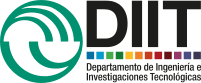](https://ingenieria.unlam.edu.ar/)    
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Posición en marco de referencia cartesiano
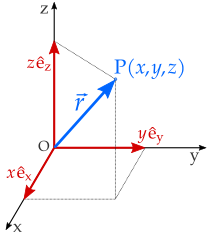

$$
\vec{r} = r \vec{r} = x \hat{e}_x +  y \hat{e}_y + z \hat{e}_z = (x,y,z)
$$

## Vector posición
$$
\vec{r} = r \, (\pm \hat{r} )
$$
- **Módulo** \\( r = |\vec{r}| \geq 0\\)
- **Sentido** indicado por el signo $\pm$ frente al versor 
- **Dirección** el versor \\(\hat{r}\\) en un espacio 3D  se descompone en 3 de un marco de referencia $\mathbf{e}: \hat{e}_i, \hat{e}_j, \hat{e}_k$
    - Si el marco es cartesiano estos son $\hat{e}_x, \hat{e}_y, \hat{e}_z$

## Operaciones simbólicas en Python
- [Python](https://www.python.org/): lenguaje de programación
    - interpretado: no compila antes de ejecutar linea por linea
    - interactivo: cada linea ejecutada devuelve una respuesta
    - orientado a objetos: largo de explicar... lo hablamos luego
- [Sympy](https://www.sympy.org/es/index.html): es una biblioteca de Python para matemática simbólica
    - Módulo [Physics: Classical Mechanics](https://docs.sympy.org/latest/modules/physics/mechanics/index.html) para la mecánica

### Bibliotecas de Python
Hay varias opciones para _importar_ bibliotecas
- `import` para su conjunto de funciones
- `from` para seleccionar un sub-conjunto

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica

En Jupyter, este sistema que presenta información en bloques, este es uno de código.  
Para que el resultado de su ejecución pueda usarse, estas importaciones, hay que _correrlo_. 

### Suma de vectores

Sie establecemos un marco de referencia
- Los \\(\hat{e}_i, \hat{e}_j, \hat{e}_k\\) que utilizaremos son los del **sistema cartesiano**: \\(\hat{e}_x, \hat{e}_y, \hat{e}_z\\).  
    - Son lo que usa por defecto `mechanics`.

In [2]:
E = mech.ReferenceFrame('e') # sistema de referencia cartesiano fijo al suelo

creamos luego dos vectores

In [27]:
a_x, a_y, a_z, b_x, b_y, b_z = sym.symbols('a_x, a_y, a_z, b_x, b_y, b_z')
a= a_x* E.x+ a_y* E.y+ a_z* E.z
b= b_x* E.x+ b_y* E.y+ b_z* E.z
a, b

y les sumamos automáticamente se agrupan las componentes por su respectivo versor en ese marco.

In [28]:
c = a + b
c

### Dando valores a las variables
Tenemos la suma simbólica, pero si tengo los valores de las componentes me interesa obtener un resultado numérico.

Para ello armamos un **diccionario** que indique cuanto vale cada variable.

In [31]:
valores={a_x: 3, a_y: 0, a_z: 5,
         b_x: -5, b_y: -5, b_z: 7,
        } # son longitudes así que en el SI son [m] salvo otra indicación
c.subs(valores) # esto substituye variables en vector c

### Múltiplicar por un escalar
Si al vector $\vec{a}$ se lo multiplica por un escalar, e.g. $m$, se aplica este a cada componente.

In [20]:
m = sym.Symbol('m') # un escalar
m* a

### Producto escalar entre vectores
\\(\vec{a} \cdot \vec{b} = a b \cos(\theta) = a_x b_x+ a_y b_y + a_z b_z \\)

In [6]:
a.dot(b)

a_x*b_x + a_y*b_y + a_z*b_z

#### Módulo de un vector
Se puede definir a partir del producto escalar de un vector con si mismo 
\\(a = |\vec{a}| = \sqrt{\vec{a} \cdot \vec{a}} = \sqrt{a_x^2 + a_y^2 + a_z^2 }\\)

In [7]:
aProductoA = a.dot(a) # se guarda el resultado de la operación en una variable
aProductoA # imprime en pantalla el contenido de la variable

a_x**2 + a_y**2 + a_z**2

In [8]:
sym.sqrt(aProductoA )

sqrt(a_x**2 + a_y**2 + a_z**2)

### Producto vectorial entre vectores
\\(\vec{r} \times \vec{s} = 
\begin{vmatrix}
  \hat{i} & \hat{j} & \hat{k} \\
  r_i & r_j & r_k\\
  s_i & s_j & s_k
\end{vmatrix}
= (r_j s_k - r_k s_j) \hat{i} + (r_k s_i - r_i s_k) \hat{j} + (r_i s_j - r_j s_i) \hat{k} 
\\)

In [9]:
a.cross(b)

(a_y*b_z - a_z*b_y)*e.x + (-a_x*b_z + a_z*b_x)*e.y + (a_x*b_y - a_y*b_x)*e.z

## Volvamos a la física | Velocidad
$$
\vec{v}= 
\dot{\vec{r}}= \frac{d \vec{r}}{d t} =
\frac{d}{d t}\left( r \hat{r}\right) =
\frac{d r_1}{d t} \hat{e}_1 + r_1 \frac{d \hat{e}_1}{d t} +  
\frac{d r_2}{d t} \hat{e}_2 + r_2 \frac{d \hat{e}_2}{d t} +  
\frac{d r_3}{d t} \hat{e}_3 + r_3 \frac{d \hat{e}_3}{d t}  
$$
Tendríamos seis términos según la regla de la cadena. Pero en cartesianas $\hat{e}_x, \hat{e}_y, \hat{e}_z$ apuntan siempre en la misma dirección. Como no varian en $t$ entonces
$$
\vec{v}= \dot{\vec{r}} = 
\frac{d x}{d t} \hat{e}_x +
\frac{d y}{d t} \hat{e}_y +
\frac{d z}{d t} \hat{e}_z =
\dot{x} \hat{e}_x +
\dot{y} \hat{e}_y +
\dot{z} \hat{e}_z
$$

Escribir cada símbolo que se derivará como función del tiempo puede ser tedioso.
Se puede usar una función del módulo `mechanics` para definir *símbolos dinámicos*.

In [19]:
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
t = sym.Symbol('t')
x, y, z = mech.dynamicsymbols('x, y, z')
r = x* E.x+ y* E.y+ z* E.z
r.diff(t, E) # deriva respecto a t en el marco E

# Y acá derivar en polares
Y todo el bolonqui de la regla de la cadena.

## Energía cinética
La energía cinética de una partícula de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right) .
$$
En cartesianas
$$
T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right) .
$$

Para obtener la $T$ de un sistema hay $N$ partículas se suman todas sus $T$. E.g. para un sistema con dos partículas
$$
T = \sum_{i=1}^{N=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

In [ ]:
# Parámetros físicos del sistema, i.e. las masas
m1, m2 = sym.symbols('m_1, m_2', positive=True)

# Posiciones
E = mech.ReferenceFrame('e')
t = sym.Symbol('t')
x1, x2 = mech.dynamicsymbols('x_1, x_2')
m1_r = x1* E.x
m2_r = x2* E.y

# Velocidades
m1_v= m1_r.diff(t, E)
m1_v= m1_r.diff(t, E)

# Cuadrado de las velocidades

# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v_cuadrado
m2_T = unMedio* m2* m2_v_cuadrado
T = sym.Eq(sym.Symbol('T'), (m1_T + m2_T) ) # Eq define una ecuación

Todo esto parece muy largo de escribir.
Hay una forma de evitar hacerlo cada vez.
Python, como cualquier lenguaje, permite definir funciones.
A continuación una que calcula la energía cinética a partir de la posición.